<a href="https://colab.research.google.com/github/Adeola-Jay/Kmeans-Hierarachy-DBSCAN/blob/main/Household_Population_K_Means_Hierarchy_DBSCAN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [ ]:
dataset = pd.read_csv('Household Population Data2.csv')

In [ ]:
dataset.isnull().sum()

ward name                        0
1 person in household            0
2 people in household            0
3 people in household            0
4 people in household            0
5 people in household            0
6 people in household            0
7 people in household            0
8 or more people in household    0
dtype: int64

In [ ]:
dataset.shape

(1360, 10)

In [ ]:
dataset

,ward name,1 person in household,2 people in household,3 people in household,4 people in household,5 people in household,6 people in household,7 people in household,8 or more people in household
0,City of London (aggregated),2472,1356,339,153,36,17,7,5
1,Abbey,328,417,271,131,80,49,5,8
2,Alibon,850,928,624,529,267,100,26,12
3,Barking Riverside,502,516,448,343,189,66,16,12
4,Beam,674,741,524,461,243,79,12,22
...,...,...,...,...,...,...,...,...,...
1355,Regent's Park,2324,1764,787,524,157,78,8,16
1356,St James's,2701,1563,520,261,87,26,6,8
1357,Vincent Square,2262,1652,649,363,162,40,12,28
1358,West End,3220,1730,617,261,155,59,13,20


In [ ]:
dataset.head()

,ward name,1 person in household,2 people in household,3 people in household,4 people in household,5 people in household,6 people in household,7 people in household,8 or more people in household
0,City of London (aggregated),2472,1356,339,153,36,17,7,5
1,Abbey,328,417,271,131,80,49,5,8
2,Alibon,850,928,624,529,267,100,26,12
3,Barking Riverside,502,516,448,343,189,66,16,12
4,Beam,674,741,524,461,243,79,12,22


In [ ]:
dataset.tail()

,ward name,1 person in household,2 people in household,3 people in household,4 people in household,5 people in household,6 people in household,7 people in household,8 or more people in household
1355,Regent's Park,2324,1764,787,524,157,78,8,16
1356,St James's,2701,1563,520,261,87,26,6,8
1357,Vincent Square,2262,1652,649,363,162,40,12,28
1358,West End,3220,1730,617,261,155,59,13,20
1359,Westbourne,1647,1232,733,517,327,126,50,49


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1360 entries, 0 to 1359
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   ward name                      1360 non-null   object
 1   1 person in household          1360 non-null   int64 
 2   2 people in household          1360 non-null   int64 
 3   3 people in household          1360 non-null   int64 
 4   4 people in household          1360 non-null   int64 
 5   5 people in household          1360 non-null   int64 
 6   6 people in household          1360 non-null   int64 
 7   7 people in household          1360 non-null   int64 
 8   8 or more people in household  1360 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 95.8+ KB


In [ ]:
dataset.describe()

,1 person in household,2 people in household,3 people in household,4 people in household,5 people in household,6 people in household,7 people in household,8 or more people in household
count,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000
mean,1494.636029,1437.671324,819.330147,678.536765,291.403676,121.900000,40.388235,35.346324
std,580.059841,477.368079,238.516544,226.858185,123.685725,78.359253,35.039608,42.509990
min,5.000000,3.000000,3.000000,2.000000,1.000000,1.000000,0.000000,0.000000
25%,1041.000000,1087.750000,655.000000,520.750000,198.750000,65.000000,16.000000,9.750000
50%,1422.000000,1394.500000,802.000000,666.000000,272.000000,100.000000,29.000000,20.000000
75%,1899.500000,1757.500000,990.250000,840.000000,363.000000,158.000000,54.250000,44.000000
max,3933.000000,3517.000000,1515.000000,1346.000000,739.000000,516.000000,228.000000,345.000000


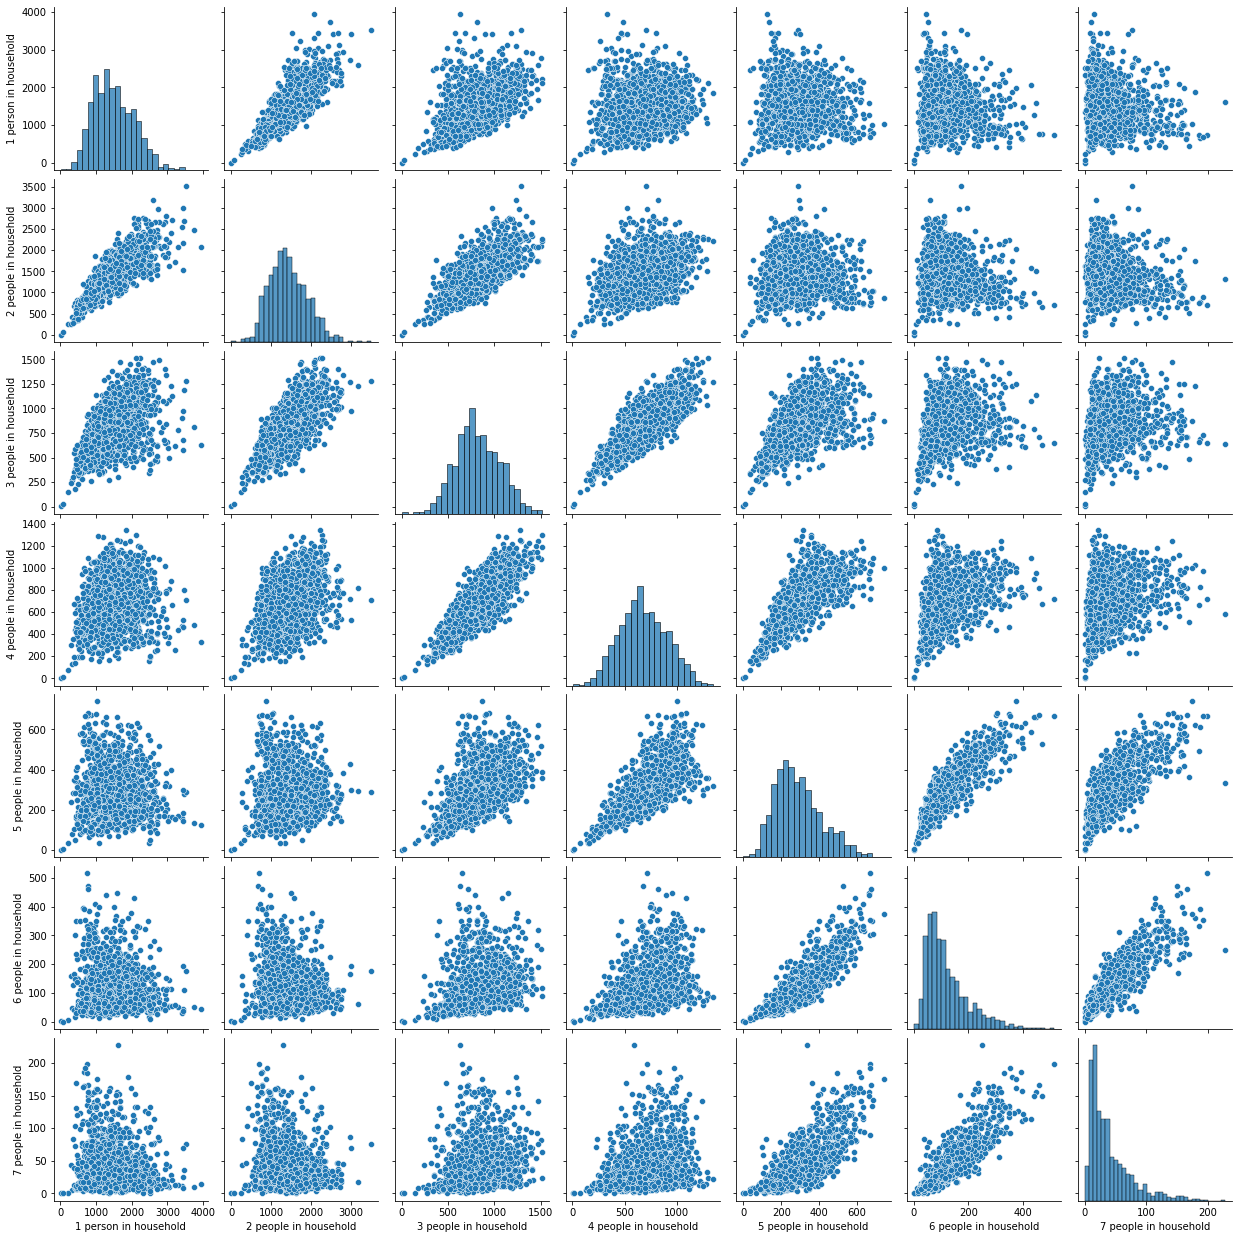

In [ ]:
X = dataset.iloc[:,1:8]
sns.pairplot(X)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X = sc_X.fit_transform(X)

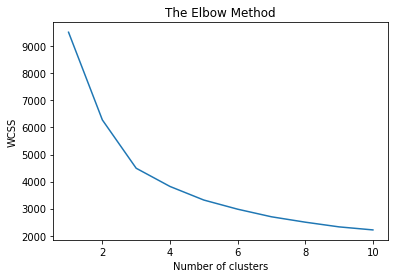

In [ ]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans (n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
dataset['Cluster'] = y_kmeans
dataset.head()

,ward name,1 person in household,2 people in household,3 people in household,4 people in household,5 people in household,6 people in household,7 people in household,8 or more people in household,Cluster
0,City of London (aggregated),2472,1356,339,153,36,17,7,5,1
1,Abbey,328,417,271,131,80,49,5,8,1
2,Alibon,850,928,624,529,267,100,26,12,1
3,Barking Riverside,502,516,448,343,189,66,16,12,1
4,Beam,674,741,524,461,243,79,12,22,1


In [ ]:
!pip install dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 5.1 MB/s 
     |████████████████████████████████| 1.3 MB 41.2 MB/s 
     |████████████████████████████████| 133 kB 52.6 MB/s 
     |████████████████████████████████| 764 kB 61.9 MB/s 
     |████████████████████████████████| 33.8 MB 1.4 MB/s 
     |████████████████████████████████| 1.0 MB 67.0 MB/s 
     |████████████████████████████████| 101 kB 10.7 MB/s 
     |████████████████████████████████| 2.2 MB 67.1 MB/s 
     |████████████████████████████████| 1.0 MB 62.4 MB/s 
     |████████████████████████████████| 1.1 MB 65.6 MB/s 
     |████████████████████████████████| 232 kB 57.7 MB/s 
     |████████████████████████████████| 96 kB 5.9 MB/s 
     |████████████████████████████████| 1.6 MB 53.5 MB/s 
     |████████████████████████████████| 49 kB 6.9 MB/s 
     |████████████████████████████████| 133 kB 69.2 MB/s 
  Created wheel for metaphone: filen

In [ ]:
# Reducing dimensionality before visualising
from sklearn.decomposition import PCA

pca= PCA(n_components=2)
X_reduced = pca.fit_transform(X)

pca.explained_variance_ratio_

array([0.50161013, 0.34544028])

In [ ]:
sum(pca.explained_variance_ratio_)

0.8470504103611334

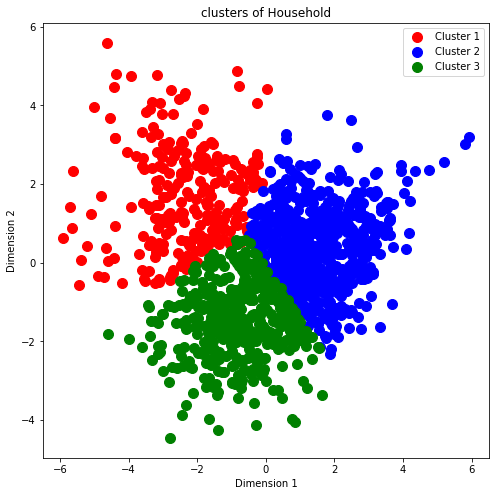

In [ ]:
# visualising the clusters

colours = ['red', 'blue', 'green']

plt.figure(figsize= (8,8))
for i in range(3):
    plt.scatter(X_reduced[y_kmeans == i , 0], X_reduced[y_kmeans == i, 1],
                s = 100, c = colours[i] , label = 'Cluster '+str(i+1))
    
plt.title('clusters of Household')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

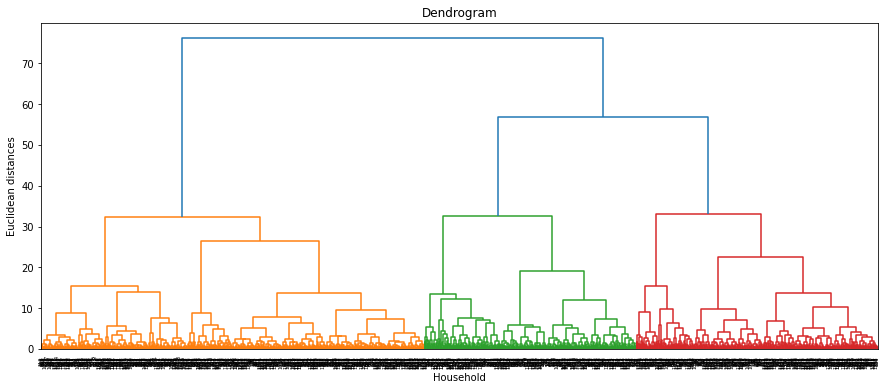

In [ ]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,6))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Household')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
# Fitting Hierarchical clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

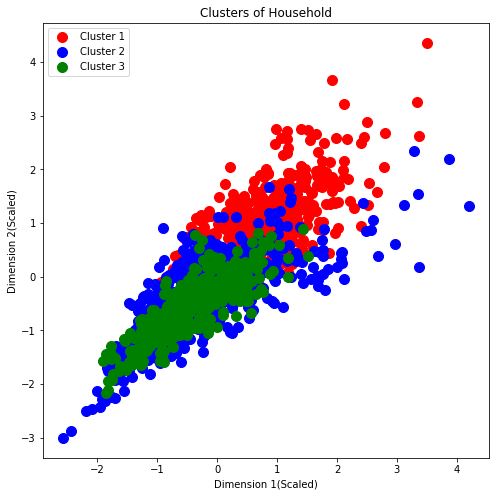

In [ ]:
# visualing the clusters
plt.figure(figsize=(8,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of Household')
plt.xlabel('Dimension 1(Scaled)')
plt.ylabel('Dimension 2(Scaled)')
plt.legend()
plt.show()

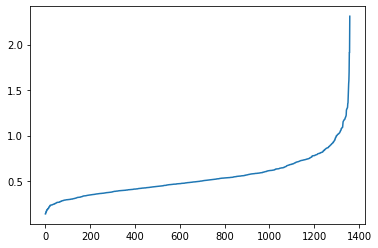

In [ ]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=2)
distances, indices = neighbors.fit(X).kneighbors(X)

distances = distances[:,1]
distances = np.sort(distances, axis=0)
plt.plot(distances)

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(X, y_kmeans)

0.3241084988753634

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1, min_samples=6)
y_dbscan = dbscan.fit_predict(X)

In [ ]:
# inspect the array to identify number of clusters

y_dbscan

array([0, 0, 0, ..., 0, 0, 0])

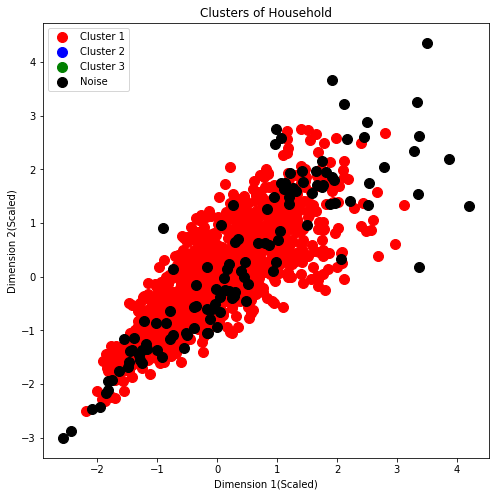

In [ ]:
# visualing the clusters
plt.figure(figsize=(8,8))
plt.scatter(X[y_dbscan == 0, 0], X[y_dbscan == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_dbscan == 1, 0], X[y_dbscan == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_dbscan == 2, 0], X[y_dbscan == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

plt.scatter(X[y_dbscan == -1, 0], X[y_dbscan == -1, 1], s = 100, c = 'black', label = 'Noise')
plt.title('Clusters of Household')
plt.xlabel('Dimension 1(Scaled)')
plt.ylabel('Dimension 2(Scaled)')
plt.legend()
plt.show()

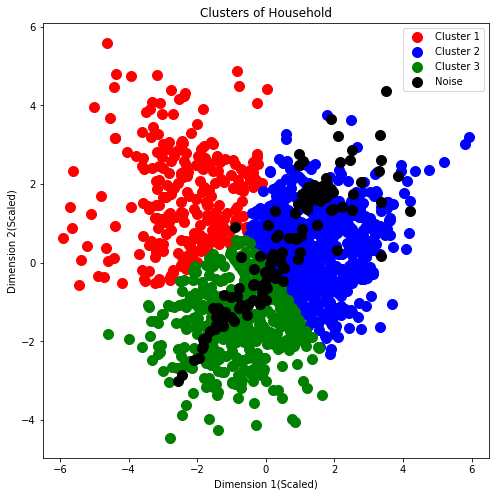

In [ ]:
colours = ['red', 'blue', 'green']

plt.figure(figsize= (8,8))
for i in range(3):
    plt.scatter(X_reduced[y_kmeans == i , 0], X_reduced[y_kmeans == i, 1],
                s = 100, c = colours[i] , label = 'Cluster '+str(i+1))
    
plt.scatter(X[y_dbscan == -1, 0], X[y_dbscan == -1, 1], s = 100, c = 'black', label = 'Noise')
plt.title('Clusters of Household')
plt.xlabel('Dimension 1(Scaled)')
plt.ylabel('Dimension 2(Scaled)')
plt.legend()
plt.show()